In [1]:
import numpy as np
import matplotlib.pyplot as plt
"""
Functions for Exam
"""
from bayesian_classifiers import NaiveBayesClassifier
from string_format import str_to_nparray, str_to_binary_nparray
from association_mining import individualSupport, itemsetSupport, conf
from similaritymeasure import *
from EM import multivariate_normal, E_step
from explained_var import individual_explained_var, cum_explained_var
from multinomial_regression import class_probabilities
from K_means import kmeans
from adaboost import getAlpha, majorityVotingClassifier, updateWeights
from AUC_ROC import AUC_no_coords
from draw_dendogram import DrawDendogram
from KNN_density import density, ard
from neural_networks import NN_output
from NeuralNetwork import NeuralNetwork
from comparing_partitions import delta, countingMat, index
from knnCV import knn_CV

#### Q2: PCA

In [7]:
s = np.array([43.67,33.47,31.15,30.36,27.77, 13.86])
ind_var = individual_explained_var(s)
cum_var = cum_explained_var(s)
print(f"A: {cum_var[4]<0.9}")
print(f"B: {cum_var[2]<0.715}")
print(f"C: {cum_var[0]<0.3}")
print(f"D: {(sum(ind_var[-2:]))<0.15}")

A: False
B: True
C: False
D: False


#### Q6: KNN Density

In [9]:
distances = """0.0 4.2 8.3 3.9 3.8 4.6 6.3 4.8 7.1 4.9
4.2 0.0 7.4 2.6 3.0 3.2 5.3 3.1 6.6 4.6
8.3 7.4 0.0 6.3 7.1 5.5 2.8 5.4 2.4 5.3
3.9 2.6 6.3 0.0 1.5 1.6 4.1 1.8 5.3 2.4
3.8 3.0 7.1 1.5 0.0 2.4 4.9 2.8 5.8 3.2 
4.6 3.2 5.5 1.6 2.4 0.0 3.7 1.7 4.8 2.3
6.3 5.3 2.8 4.1 4.9 3.7 0.0 3.8 1.9 3.6
4.8 3.1 5.4 1.8 2.8 1.7 3.8 0.0 4.9 2.1
7.1 6.6 2.4 5.3 5.8 4.8 1.9 4.9 0.0 4.4
4.9 4.6 5.3 2.4 3.2 2.3 3.6 2.1 4.4 0.0"""
distances = str_to_nparray(distances)
# What is the average relative density for observation o5 for K = 2 nearest neighbors?
print(density(distances, 4, 2))

0.5128205128205129


#### Q7: Dendrogram

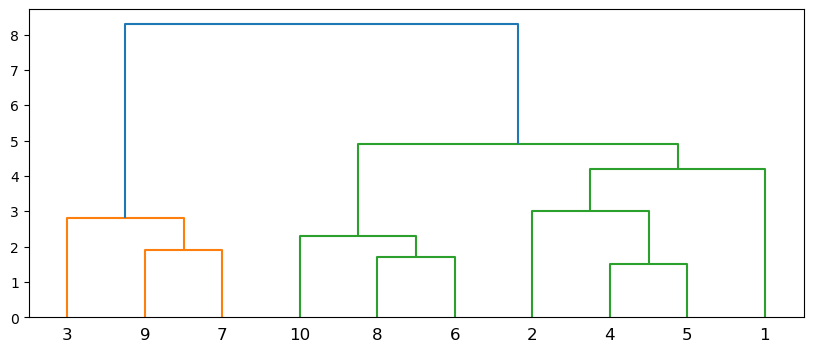

In [10]:
DrawDendogram(distances)

#### 11 - Association Mining (Support)

In [18]:
transactions = """0 0 0 0 0 1 1 1 0 1 1
1 0 0 1 0 1 1 0 1 1 1
1 1 1 1 1 0 0 0 0 1 0
0 1 0 1 0 0 0 1 0 1 0
0 0 0 0 0 1 0 1 1 1 0
0 1 1 1 1 0 0 0 1 1 0
1 1 1 1 1 0 0 1 0 1 0
0 1 1 1 1 0 0 0 1 1 0
1 1 1 1 1 0 0 1 0 1 0
0 1 1 1 1 0 0 1 0 1 0"""
transactions = str_to_binary_nparray(transactions)
# A. {f4}, {f10}, {f4, f10}
A = [[3], [9], [3, 9]]
print("A:")
for itemset in A:
    print(itemsetSupport(transactions, itemset))
# {f2}, {f4}, {f10}, {f2, f4}, {f2, f10}, {f4, f10}, {f2, f4, f10}
B = [[1], [3], [9], [1, 3], [1, 9], [3, 9], [1, 3, 9]]
print("B:")
for itemset in B:
    print(itemsetSupport(transactions, itemset))


A:
0.8
1.0
0.8
B:
0.7
0.8
1.0
0.7
0.7
0.8
0.7


#### Q12: Association Mining (Confidence)

In [19]:
# What is the confidence of the rule {f1, f3, f4, f5, f8} → {f2, f10}?
X = [0,2,3,4,7]
Y = [1,9]
print(conf(transactions, X, Y))

1.0


#### Q14: Ridge Regression

In [39]:
y = np.array([6,7,7,9])
y_hat = y-np.mean(y)


x = np.array([2, 5, 6, 7])
x_hat = (x-np.mean(x))/np.std(x, ddof=1)


w = 0.6

s = np.linalg.norm(y_hat - w*x_hat, ord=2)**2
E = s + 2*(w**2)


E

2.6615555809552838